In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import sklearn
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler #to scale our data
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
from sklearn.decomposition import PCA

#to evaluate the model
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#setting default plotting parameters for notebook
%matplotlib inline
rcParams['figure.figsize']=7,7

In [3]:
train=pd.read_csv('trainset.csv',index_col="ID")
len(train)
train.head(2)

,USER TYPE,CATEGORY,JAN_09,FEB_09,MAR_09,APR_09,MAY_09,JUN_09,JUL_09,AUG_09,...,MAR_15,APR_15,MAY_15,JUN_15,JUL_15,AUG_15,SEP_15,OCT_15,NOV_15,DEC_15
ID,,,,,,,,,,,,,,,,,,,,,
137072,6,0,-0.001278,-0.000698,-0.000323,-0.000432,-0.000369,-0.001250,-0.001252,-0.001276,...,-0.001553,-0.001450,-0.001754,-0.002559,-0.004255,-0.004862,-0.010466,-0.010456,-0.002166,-0.002095
119192,0,0,-0.001885,-0.001278,-0.001027,-0.001042,-0.000652,-0.001026,-0.001023,-0.001216,...,-0.001535,-0.001666,-0.001936,-0.002719,-0.004376,-0.005013,-0.010977,-0.010649,-0.002052,-0.001951


In [4]:
#train

In [5]:
# train.drop(train.columns[0], axis=1, inplace=True)
# #train

In [6]:
# #building and running the model to check for clusters
# clustering=KMeans(n_clusters=2, random_state=5)
# cluster_found=clustering.fit(train)

In [7]:
# #checking our plotting features
# fig, ax= mp.subplots(1,1, figsize=(18,10))
# cluster_found = clustering.fit_predict(train)
# cluster_found_sr = pd.Series(cluster_found, name='clustering')
# train= train.set_index(cluster_found_sr, append=True )

# color_list = ['blue','green']
# cluster_values = sorted(train.index.get_level_values('clustering').unique())

# for cluster, color in zip(cluster_values, color_list):
#     train.xs(cluster, level=1).T.plot(
#         ax=ax, legend=False, alpha=0.01, color=color, label= f'Cluster {clustering}'
#         )
#     train.xs(cluster, level=1).median().plot(
#         ax=ax, color=color, alpha=0.9, ls='--'
#     )

# ax.set_xticks(np.arange(1,25))
# ax.set_ylabel('consumption')

In [8]:
kmeans = KMeans(n_clusters=2, max_iter=700, algorithm = 'auto')
train['cluster']=kmeans.fit_predict(train[train.columns[1:]])
train

,USER TYPE,CATEGORY,JAN_09,FEB_09,MAR_09,APR_09,MAY_09,JUN_09,JUL_09,AUG_09,...,APR_15,MAY_15,JUN_15,JUL_15,AUG_15,SEP_15,OCT_15,NOV_15,DEC_15,cluster
ID,,,,,,,,,,,,,,,,,,,,,
137072,6,0,-0.001278,-0.000698,-0.000323,-0.000432,-0.000369,-0.001250,-0.001252,-0.001276,...,-0.001450,-0.001754,-0.002559,-0.004255,-0.004862,-0.010466,-0.010456,-0.002166,-0.002095,0
119192,0,0,-0.001885,-0.001278,-0.001027,-0.001042,-0.000652,-0.001026,-0.001023,-0.001216,...,-0.001666,-0.001936,-0.002719,-0.004376,-0.005013,-0.010977,-0.010649,-0.002052,-0.001951,0
108425,6,2,-0.001723,-0.001236,-0.000903,-0.001004,-0.000605,-0.000913,-0.000835,-0.001076,...,-0.001214,-0.001977,-0.002591,-0.004336,-0.004912,-0.012101,-0.009492,-0.002654,-0.002471,1
131415,0,0,-0.001480,-0.000946,-0.000737,-0.001157,-0.001006,-0.001205,-0.001064,-0.001156,...,-0.001391,-0.001673,-0.002463,-0.004135,-0.004761,-0.011079,-0.009299,-0.002195,-0.002153,0
78924,3,0,-0.001075,-0.000532,-0.000157,-0.000242,-0.000251,-0.000554,-0.000606,-0.000836,...,-0.001470,-0.001531,-0.002240,-0.003933,-0.004359,-0.009955,-0.008527,-0.002023,-0.001835,0
118613,0,0,-0.002007,-0.001526,-0.000903,-0.000966,-0.000699,-0.000958,-0.000981,-0.001216,...,-0.001254,-0.001510,-0.002208,-0.003893,-0.004309,-0.009853,-0.008335,-0.001994,-0.001806,0
90705,3,0,-0.001480,-0.000905,-0.000530,-0.001462,-0.001006,-0.001250,-0.001252,-0.001457,...,-0.001489,-0.001754,-0.002687,-0.004417,-0.004962,-0.011284,-0.010842,-0.002367,-0.002182,0
103928,5,0,-0.002128,-0.001609,-0.001193,-0.001195,-0.000770,-0.001071,-0.000981,-0.001336,...,-0.001646,-0.001835,-0.002751,-0.004538,-0.005214,-0.011795,-0.011420,-0.002511,-0.002298,0
19406,0,0,-0.001683,-0.001112,-0.000778,-0.000852,-0.000629,-0.000891,-0.000918,-0.001156,...,-0.001352,-0.001612,-0.002368,-0.004094,-0.004560,-0.010364,-0.009299,-0.002138,-0.002038,0


In [9]:
X = np.array(train.drop(['cluster'], 1).astype(float))
y = np.array(train['cluster'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
 #You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=700,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:

correct = 0
for i in range(len(X_scaled)):
    predict_me = np.array(X_scaled[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X_scaled))
#ON CATEGORY GIVES 72% ON cLUSTER GIVES 86%

0.8679226144369444


Text(0.5,1,'clustered chart')

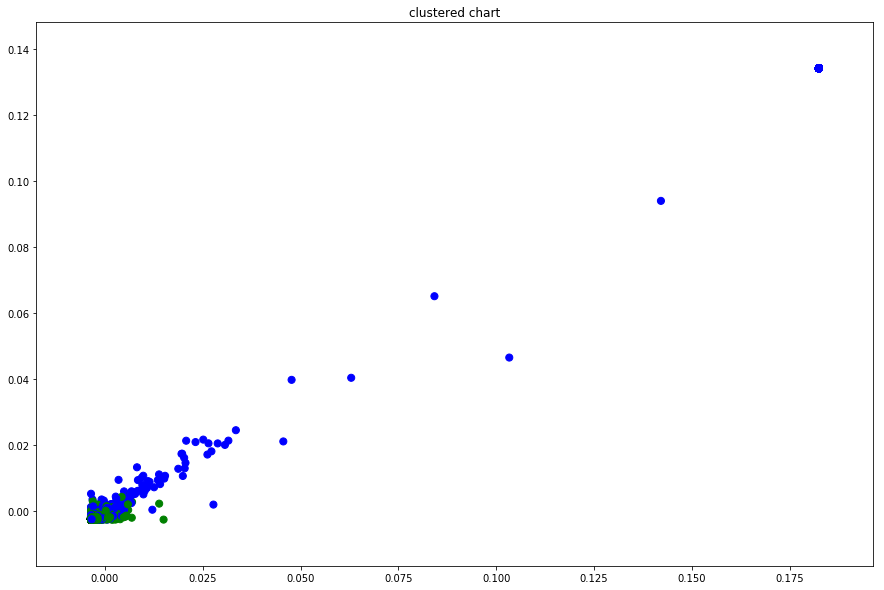

In [32]:
Xa = np.array(train.drop(['cluster'], 1).astype(float))
ya = np.array(train['cluster'])
mp.figure(figsize=(15,10))
mp.scatter(x=train['JAN_15'],y=train['FEB_15'],c=color_themes[ya], s=50)
mp.title('clustered chart')